In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn3

def flatten(t):
    return [item for sublist in t for item in sublist]

network_type = "large"
target_db = "Merged"

In [2]:
targets_outcomes = pd.read_csv(f'../../../2_feature_extraction/{network_type}/features_{target_db} Target.csv', index_col=0)
targets_outcomes = targets_outcomes[targets_outcomes['Outcome'].isin(['No-Effect', 'Cyto', 'Strong', 'Weak'])]
targets_outcomes = targets_outcomes.replace({'Weak': 'Effect', 'Strong': 'Effect'})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


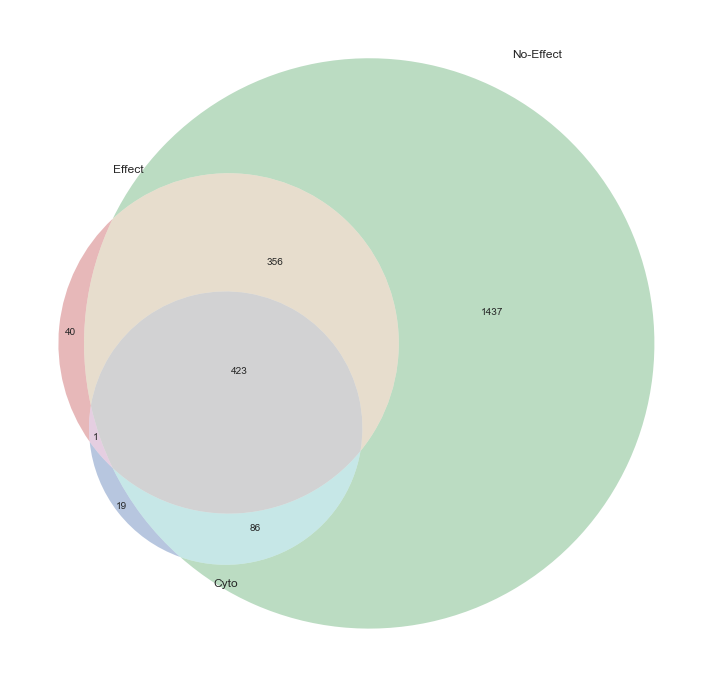

In [3]:
sns.set("talk", font_scale=1.2)
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

effect = set(flatten(targets_outcomes[targets_outcomes['Outcome'] == 'Effect'].dropna().loc[:, 'Target'].apply(lambda x: x.split(", ")).tolist()))
no_effect = set(flatten(targets_outcomes[targets_outcomes['Outcome'] == 'No-Effect'].dropna().loc[:, 'Target'].apply(lambda x: x.split(", ")).tolist()))
cyto = set(flatten(targets_outcomes[targets_outcomes['Outcome'] == 'Cyto'].dropna().loc[:, 'Target'].apply(lambda x: x.split(", ")).tolist()))



venn3([effect, no_effect, cyto], ('Effect', 'No-Effect', 'Cyto'), ax=ax, )

plt.tight_layout()
fig.savefig('venn.pdf', dpi=300, format='pdf')
fig.savefig('venn.png', dpi=300, format='png')
fig.savefig('venn.eps', dpi=300, format='eps')
fig.savefig('venn.svg', dpi=300, format='svg')